# Iris Flower Dataset Classification Using Naive Bayes Classifiers

## The Iris Flower Dataset

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

## Naive Bayes Classifiers

### Sources

http://www.cs.columbia.edu/~mcollins/em.pdf

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

### What are Naive Bayes Classifiers?

Naive Bayes Classifiers are probabilistic supervised machine learning models that are used for classification tasks. The crux of the classifiers is based on the Bayes theorem. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.

### How do Naive Bayes Classifiers work?

For a given training dataset of $l$ points of the form $ (\mathbf{x_1}, y_1), ..., (\mathbf{x_l}, y_l) $ where $ \mathbf{x_j} \in \mathit{R}^n $ and $ y \in \{1,2,...,d\}$, and $ d $ is an integer specifying the number of classes in the problem, the task is to map each input vector $ \mathbf{x} $ to a label $ y $ that can take any one of $ d $ possible values.

Naive Bayes Classifiers require the solution of the following optimization problem:

\begin{align}
C = \underset{\mathbf{C_k}}{\text{arg max}} & \; p(C_k) \prod_{j=1}^l p(\mathbf{x_j}|C_k) 
\end{align}

### Derivation

Assuming random variables $ Y $ and $ X_1,...,X_l $ (iid) correspond to label $ y $ and vector components $ \mathbf{x_1}, \mathbf{x_2}, ... , \mathbf{x_l} $, we model the joint probability

\begin{align}
P(Y=y, X_1 = \mathbf{x_1}, X_2 = \mathbf{x_2}, ..., X_l = \mathbf{x_l}) 
\end{align}

for any label $ y $ paired with attribute values $ \mathbf{x_1}, \mathbf{x_2}, ... , \mathbf{x_l} $:

\begin{align}
  \quad & P(Y=y,  X_1 = \mathbf{x_1}, X_2 = \mathbf{x_2}, ..., X_l = \mathbf{x_l}) \\
= \quad & P(Y=y)\times P(X_1 = \mathbf{x_1}, X_2 = \mathbf{x_2}, ..., X_l = \mathbf{x_l} | Y=y) & \text{(Chain rule)} \\
= \quad & P(Y=y)\times \prod_{j=1}^l P(X_j=\mathbf{x_j} | X_1 = \mathbf{x_1}, X_2 = \mathbf{x_2}, ..., X_{j-1} = \mathbf{x_{j-1}}, Y=y) \qquad & \text{(Chain rule)} \\
= \quad & P(Y=y)\times \prod_{j=1}^l P(X_j=\mathbf{x_j} | Y=y) & \qquad \text{(Independence assumption)} \\
\end{align}

This independence assumption is in fact the Naive Bayes assumption.  It is naive, in the sense that it is a relatively strong assumption. It is, however, a very useful assumption, in that it dramatically reduces the number of parameters in the model, while still leading to a model that can be quite effective in practice.

Now, let us define the following parameters: 
$$ P(Y=y)=p(C_k) \ \forall \ k \in \{1,...,d\} $$ 

with constraints $ p(C_k) \ge 0 $ and $ \sum_1^d p(C_k)=1 $; 

and:
$$ P(X_j=\mathbf{x_j} | Y=y) = p(\mathbf{x_j}|C_k) \ \forall \ j \in \{1,...,l\}, \ \mathbf{x_j} \in \mathit{R}^n, \ y \in \{1,2,...,d\} $$ 

with constraints $ p(\mathbf{x_j}|C_k) \ge 0 $ and $ \ \forall \ C_k,j, \ \sum_{x_j} p(\mathbf{x_j}|C_k)=1 $

We now have:

\begin{align}
P(y, \mathbf{x_1}, \mathbf{x_2}, ...,  \mathbf{x_l}) = p(C_k) \prod_{j=1}^l p(\mathbf{x_j}|C_k)
\end{align}

Once parameters are estimated from training samples, given a new test example, the output of the Naive Bayes Classifier is:
$$ C = \underset{\mathbf{y \in \{1,...,d\}}}{\text{arg max}} \; P(y, \mathbf{x_1}, \mathbf{x_2}, ...,  \mathbf{x_l}) 
     = \underset{\mathbf{C_k}}{\text{arg max}} \; p(C_k) \prod_{j=1}^l p(\mathbf{x_j}|C_k)  $$

## Python Code

### Section 0: Load relevant materials

In [1]:
# Load relevant packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from pandas.plotting import scatter_matrix

In [2]:
# Load iris dataset
iris_data = datasets.load_iris()

### Section 1: Data exploration

In [3]:
iris_data.data.shape

(150, 4)

In [4]:
# View first ten rows
iris_data.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Section 2: Data plotting

In [ ]:
#df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
#scatter_matrix(df, alpha = 0.6, figsize = (8,8), diagonal = 'kde')

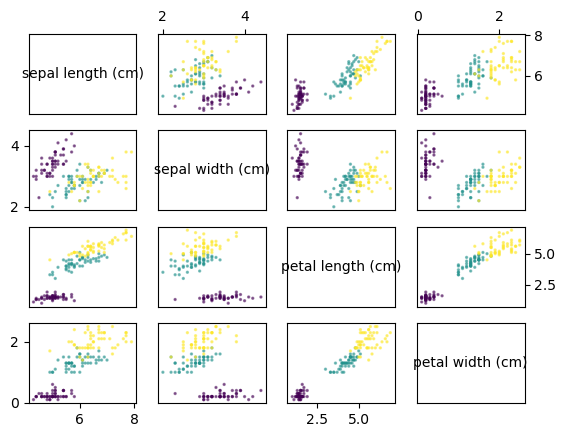

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=4)

# Plot data
for i in range(4):
    for j in range(4):
        if i != j:
            axs[i, j].scatter(x=iris_data.data[:,j], 
                              y=iris_data.data[:,i],
                              s=2,
                              c=iris_data.target, 
                              alpha=0.5)


for ax in axs.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Set up ticks only on one side for the "edge" subplots...
        if ax.get_subplotspec().is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.get_subplotspec().is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.get_subplotspec().is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.get_subplotspec().is_last_row():
            ax.xaxis.set_ticks_position('bottom')

# Turn on the proper x or y axes ticks.
for i, j in zip(range(4), itertools.cycle((-1, 0))):
        axs[j,i].xaxis.set_visible(True)
        axs[i,j].yaxis.set_visible(True)            
            
# Label the diagonal subplots...
for i, label in enumerate(iris_data.feature_names):
    axs[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',ha='center', va='center')       
        
plt.show()

# Source: https://stackoverflow.com/questions/7941207/is-there-a-function-to-make-scatterplot-matrices-in-matplotlib

### Section 3: Data mining using SVMs

The following code uses "SUPPORT VECTOR CLASSIFICATION" from SCIKIT-LEARN.

In [9]:
features = iris_data.data
target = iris_data.target
feature_train, feature_test, target_train, target_test = train_test_split(features, target)
model = GaussianNB()
fitted_model = model.fit(feature_train, target_train)
predictions = fitted_model.predict(feature_test)

In [10]:
target_test

array([0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0])

In [11]:
predictions

array([0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0])

In [12]:
confusion_matrix(target_test, predictions)

array([[16,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 12]], dtype=int64)

In [13]:
accuracy_score(target_test, predictions)

0.9473684210526315

### Section 4: Try a new data point

In [14]:
new_values=fitted_model.predict(np.array([[4.9, 3.5, 1.4, 0.2]]))
new_values

array([0])

In [15]:
iris_data.target_names[new_values]

array(['setosa'], dtype='<U10')